<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>Tải các thư viện cần thiết</strong></p>
</div>


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
 
warnings.filterwarnings('ignore')

In [32]:
# Tải dữ liệu từ file CSV (Ví dụ, bạn cần tải dataset Kaggle)
df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')  

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>1. Thông tin tổng quan của Dataset:</strong></p>
</div>


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>2. Loại bỏ cột có tỉ lệ missing values cao:</strong></p>
</div>


In [34]:
# Phân tích dữ liệu bị thiếu
missing_data =df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
})

print(missing_df)


              Missing Count  Missing %
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageFinish             81   5.547945
GarageQual               81   5.547945
GarageCond               81   5.547945
BsmtFinType2             38   2.602740
BsmtExposure             38   2.602740
BsmtFinType1             37   2.534247
BsmtCond                 37   2.534247
BsmtQual                 37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493


In [35]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df.drop(columns=cols_to_drop, inplace=True)

In [36]:
missing_df = df.copy()
# Lọc chỉ giữ các cột có ít nhất 1 giá trị missing
missing_cols = missing_df.columns[missing_df.isnull().any()]
# Giữ lại chỉ các cột bị missing
missing_df = missing_df[missing_cols]

In [37]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [38]:
df.to_csv('Stage1.csv', index=False)

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>3. Xử lý cột bị mising values</strong></p>
</div>


In [39]:
# Tách các cột dạng số và dạng phân loại
numeric_cols = missing_df.select_dtypes(include=['number'])
categorical_cols = missing_df.select_dtypes(include=['object', 'category'])

# Lưu vào DataFrame mới
missnum_df = numeric_cols.copy()  # Sao chép cột dạng số
misscat_df = categorical_cols.copy()  # Sao chép cột dạng phân loại
print(missnum_df.shape)
print(misscat_df.shape)

(1460, 3)
(1460, 12)


In [40]:
# Cột số - điền bằng median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())


In [41]:
# Cột kiểu chuỗi (categorical) - điền bằng 'None'
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
# Điền cột Electrical = mode vì chỉ thiếu 1
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [42]:
#Kiểm tra missing values trong bảng
print("Số lượng missing value còn lại:")
print(df.isnull().sum().sort_values(ascending=False).head(100))


Số lượng missing value còn lại:
Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 77, dtype: int64


In [43]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [44]:
df.to_csv('Stage2.csv', index=False)

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>4. Xử lý cột bị lệch nặng</strong></p>
</div>


In [45]:
# Số lượng cột dạng số có trong bảng
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()  
number_df = df[numeric_cols]
len(numeric_cols)

38

In [46]:
# In số giá trị duy nhất cho từng cột
unique_counts = {col: number_df[col].nunique() for col in numeric_cols}
unique_counts

{'Id': 1460,
 'MSSubClass': 15,
 'LotFrontage': 110,
 'LotArea': 1073,
 'OverallQual': 10,
 'OverallCond': 9,
 'YearBuilt': 112,
 'YearRemodAdd': 61,
 'MasVnrArea': 327,
 'BsmtFinSF1': 637,
 'BsmtFinSF2': 144,
 'BsmtUnfSF': 780,
 'TotalBsmtSF': 721,
 '1stFlrSF': 753,
 '2ndFlrSF': 417,
 'LowQualFinSF': 24,
 'GrLivArea': 861,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'TotRmsAbvGrd': 12,
 'Fireplaces': 4,
 'GarageYrBlt': 97,
 'GarageCars': 5,
 'GarageArea': 441,
 'WoodDeckSF': 274,
 'OpenPorchSF': 202,
 'EnclosedPorch': 120,
 '3SsnPorch': 20,
 'ScreenPorch': 76,
 'PoolArea': 8,
 'MiscVal': 21,
 'MoSold': 12,
 'YrSold': 5,
 'SalePrice': 663}

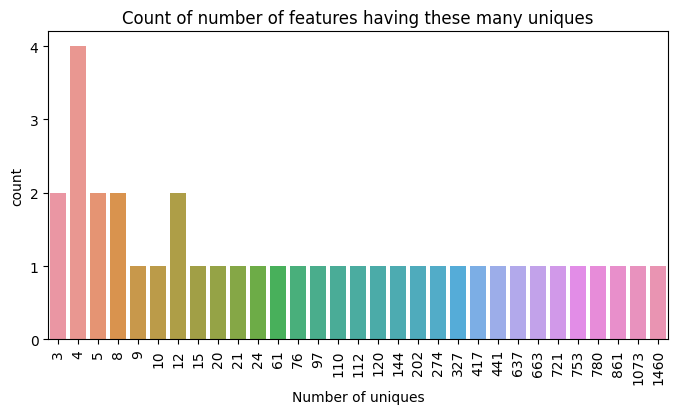

In [47]:
plt.figure(figsize=(8, 4))
plt.xlabel('Number of uniques')
plt.xticks(rotation=90)
plt.yticks(range(0, 5))  # Điều chỉnh nếu cần
plt.title('Count of number of features having these many uniques')

# Chuyển list thành pd.Series để tránh cảnh báo
sns.countplot(x=pd.Series(list(unique_counts.values())))
plt.show()


In [48]:
# Lựa ra các cột có số lượng giá trị duy nhất bé hơn 15
columns_with_few_uniques = [col for col, count in unique_counts.items() if count <= 15]
# Lựa ra các cột có số lượng giá trị duy nhất lớn hơn 15
columns_with_many_uniques = [col for col, count in unique_counts.items() if count > 15]

# Đếm và hiển thị số lượng cột có nhiều giá trị duy nhất
print("Số lượng cột có nhiều giá trị duy nhất:", len(columns_with_many_uniques))

# Đếm và hiển thị số lượng cột có ít giá trị duy nhất
print("Số lượng cột có ít giá trị duy nhất:", len(columns_with_few_uniques))

Số lượng cột có nhiều giá trị duy nhất: 23
Số lượng cột có ít giá trị duy nhất: 15


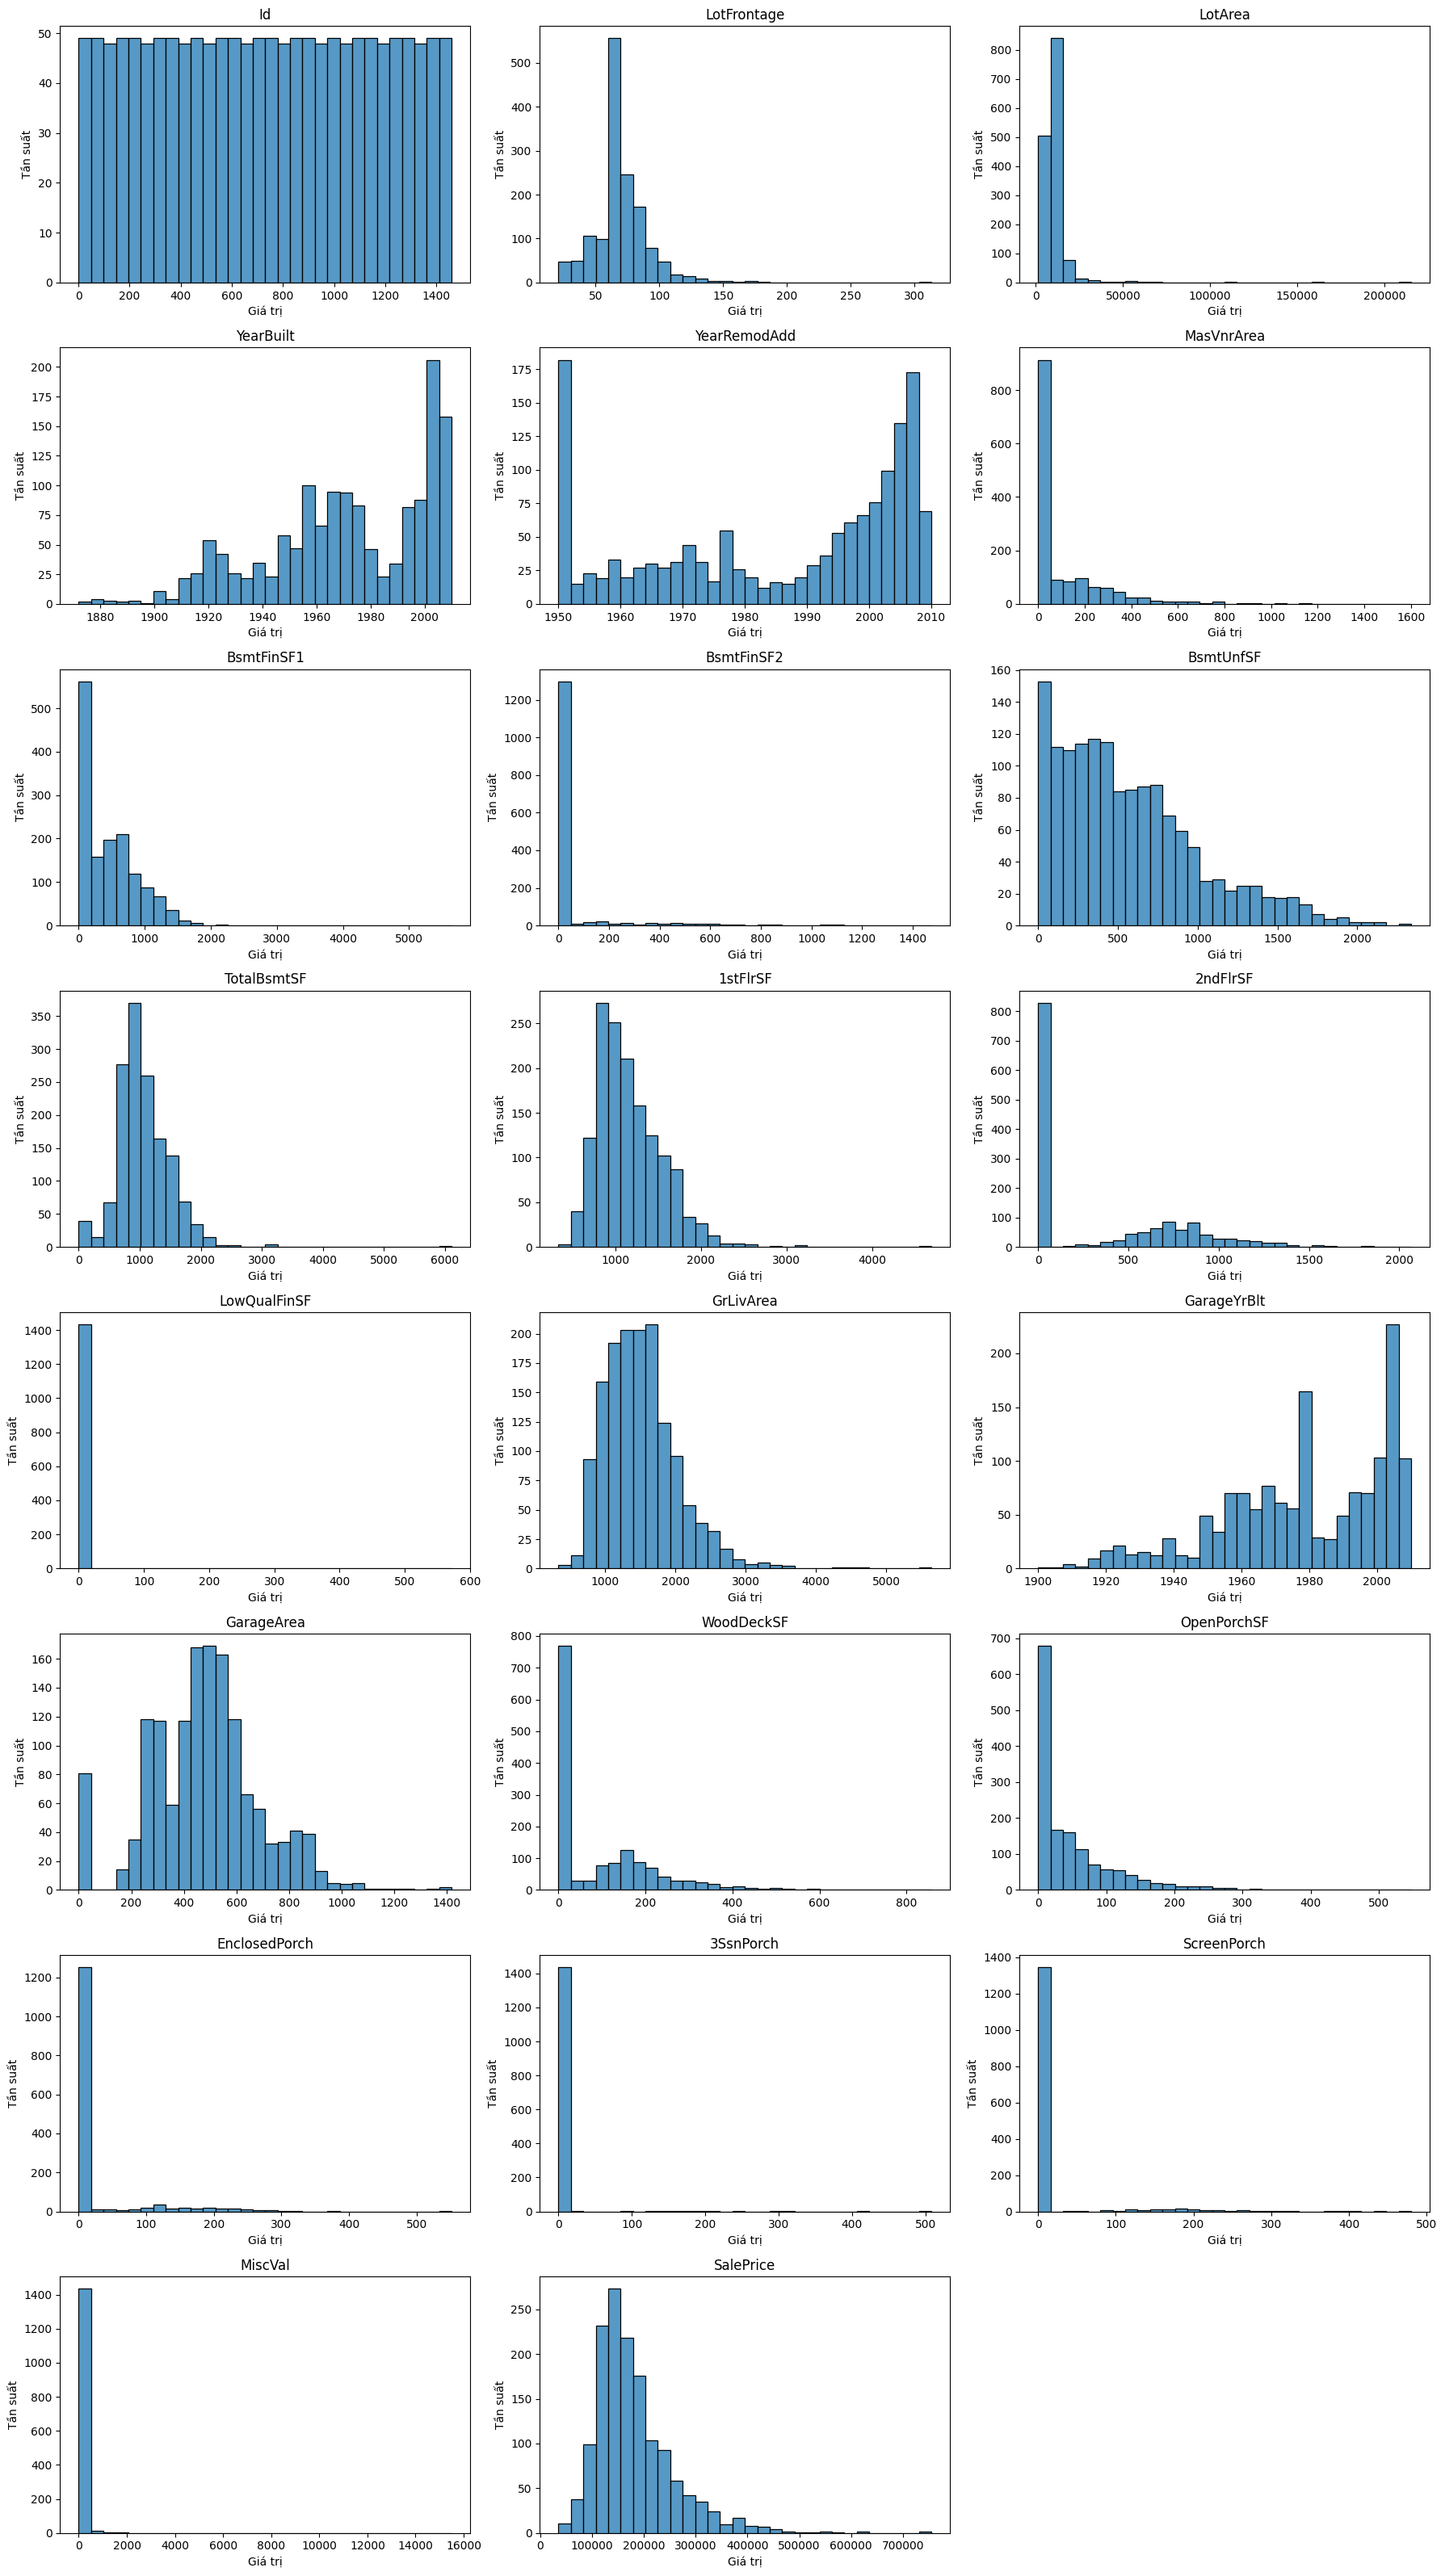

In [49]:
cols_per_row = 3  # Số cột trong mỗi hàng
rows = (len(columns_with_many_uniques) // cols_per_row) + (len(columns_with_many_uniques) % cols_per_row > 0)

plt.figure(figsize=(18, 4 * rows))  # Điều chỉnh chiều cao theo số hàng
for i, col in enumerate(columns_with_many_uniques):
    plt.subplot(rows, cols_per_row, i + 1)  # Sắp xếp các biểu đồ thành lưới
    sns.histplot(df[col], kde=False, bins=30)
    plt.title(col)
    plt.xlabel('Giá trị')
    plt.ylabel('Tần suất')

plt.tight_layout()
# Lưu hình ảnh vào file
plt.savefig('distribution_plots.png')  # Đặt tên và định dạng file
plt.show()

In [50]:
skewed_num_features = ['ScreenPorch', 'LowQualFinSF', '3SsnPorch',
                       'BsmtFinSF2', 'MiscVal', 'EnclosedPorch']
# Lấy các cột nhiều giá trị duy nhất trừ đi các cột có độ lệch
columns_with_many_uniques = [col for col in columns_with_many_uniques if col not in skewed_num_features]
df = df.drop(columns=[col for col in skewed_num_features if col in df.columns])

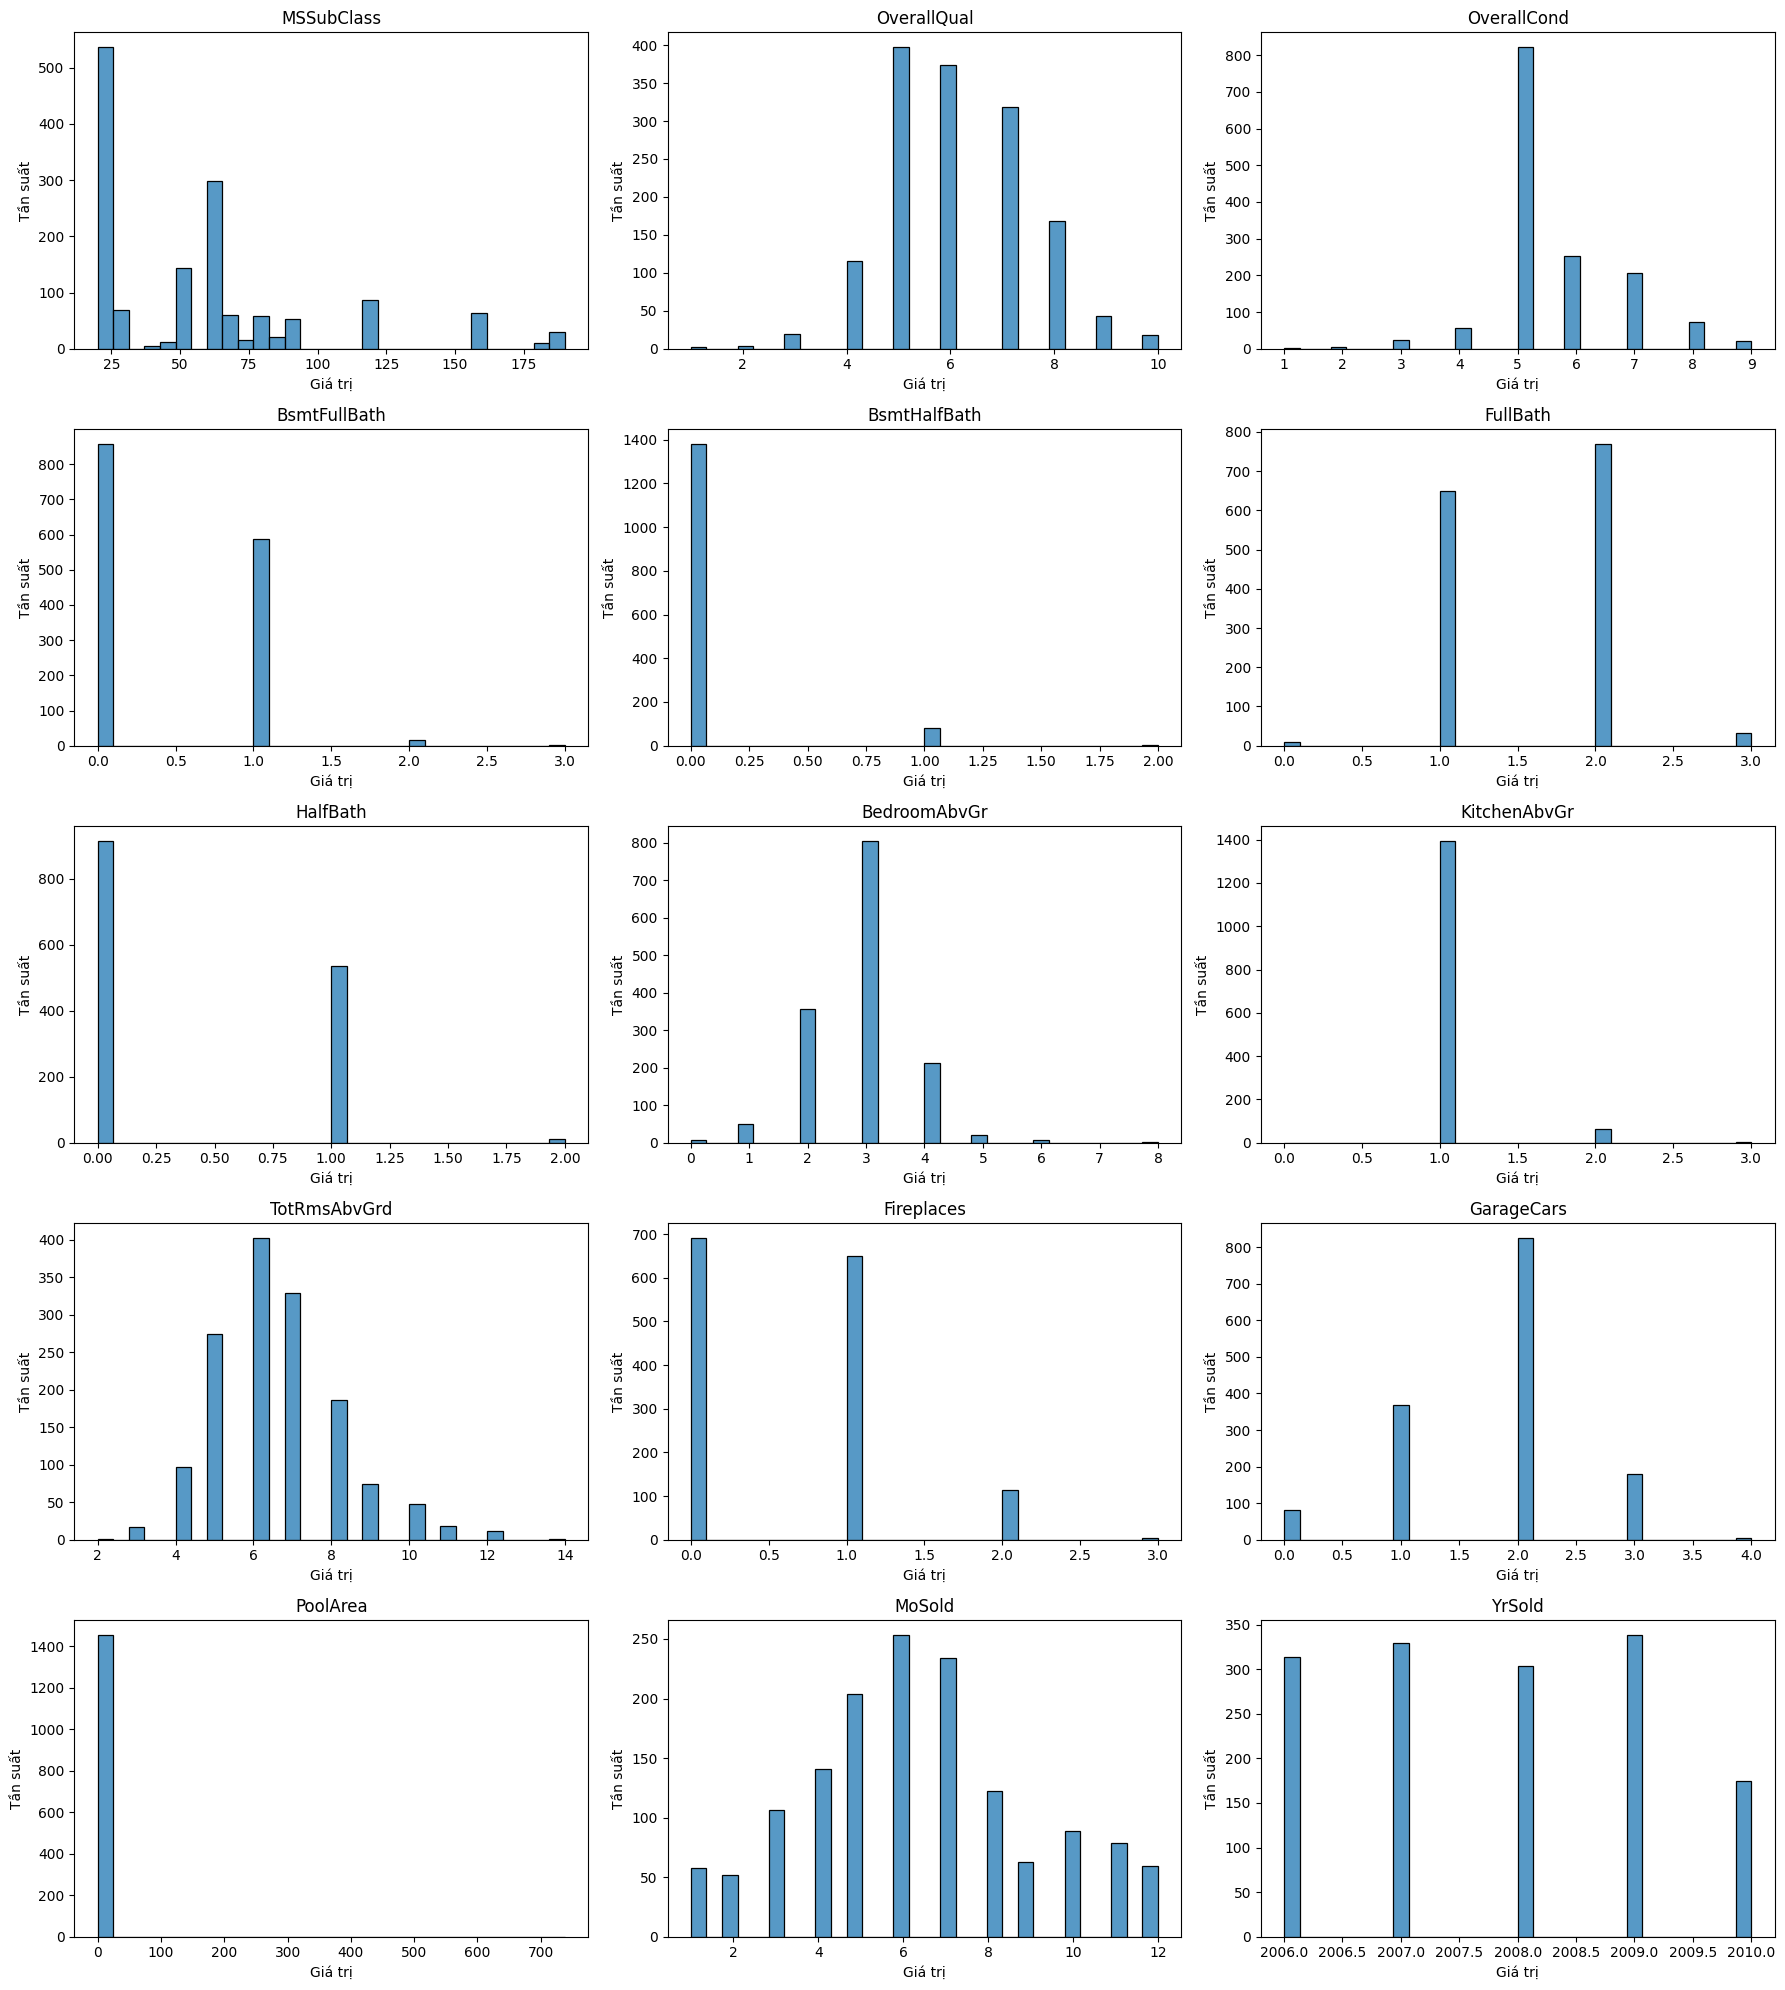

In [51]:
cols_per_row = 3  # Số cột trong mỗi hàng
rows = (len(columns_with_few_uniques) // cols_per_row) + (len(columns_with_few_uniques) % cols_per_row > 0)

plt.figure(figsize=(18, 4 * rows))  # Điều chỉnh chiều cao theo số hàng
for i, col in enumerate(columns_with_few_uniques):
    plt.subplot(rows, cols_per_row, i + 1)  # Sắp xếp các biểu đồ thành lưới
    sns.histplot(df[col], kde=False, bins=30)
    plt.title(col)
    plt.xlabel('Giá trị')
    plt.ylabel('Tần suất')

plt.tight_layout()
plt.savefig('distribution_plots1.png')  # Đặt tên và định dạng file
plt.show()

In [52]:
skewed_num_features = ['PoolArea']
# Lấy các cột nhiều giá trị duy nhất trừ đi các cột có độ lệch
columns_with_few_uniques = [col for col in columns_with_few_uniques if col not in skewed_num_features]
df = df.drop(columns=[col for col in skewed_num_features if col in df.columns])

In [53]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,40,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,349,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,60,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,366,0,4,2010,WD,Normal,142125


In [54]:
df.to_csv('Stage3.csv', index=False)

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>5. Xử lý outliers </strong></p>
</div>


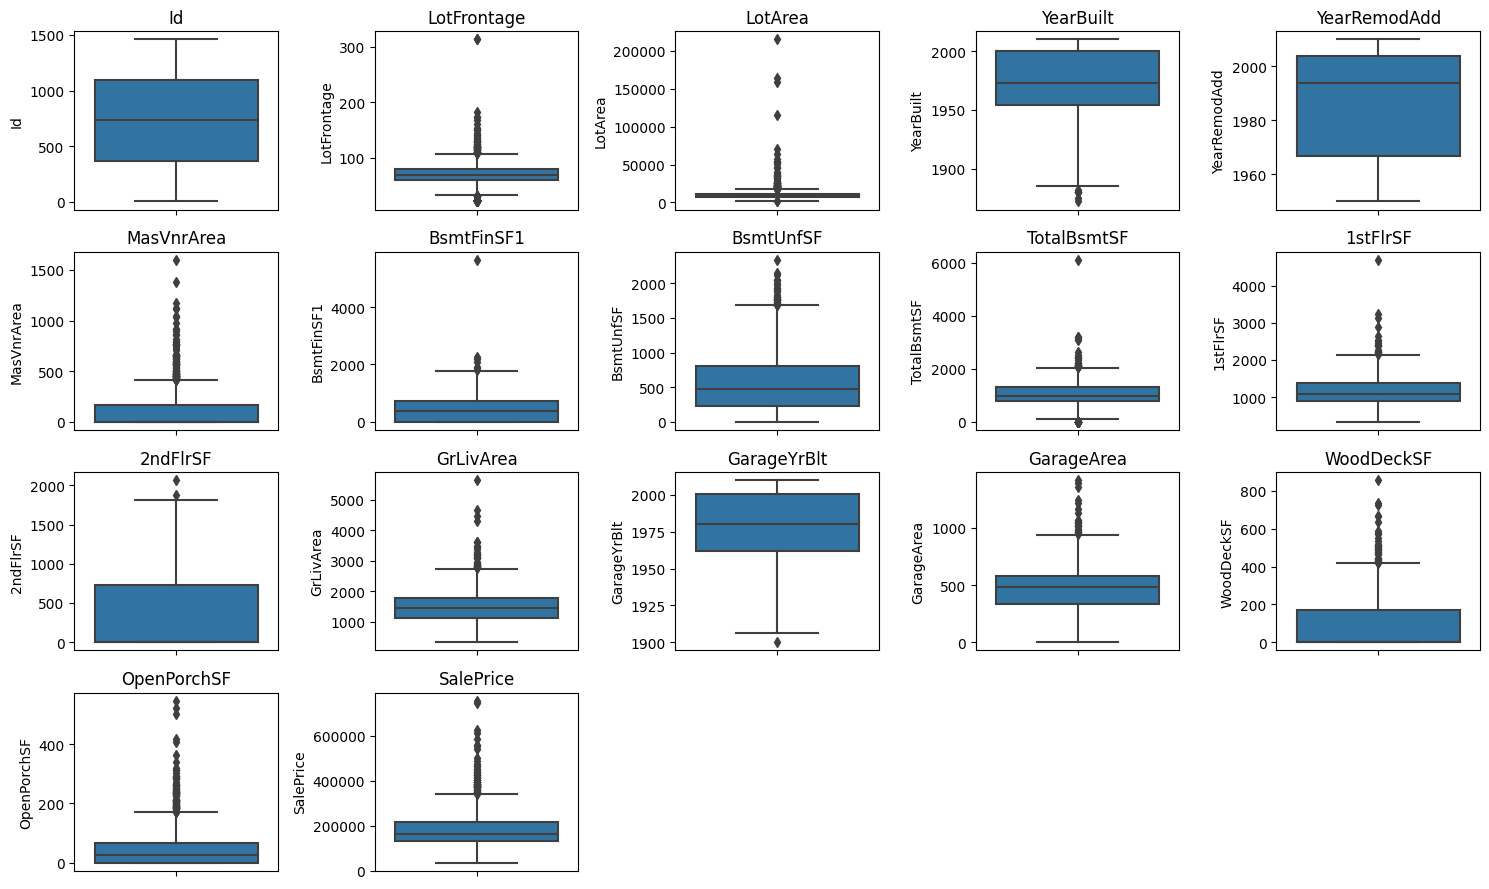

In [55]:
# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(15, 9))

# Vẽ boxplot cho từng cột trong columns_with_many_uniques
for i, col in enumerate(columns_with_many_uniques):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y = col, data = df[columns_with_many_uniques].dropna())
    plt.title(col)

# Hiển thị biểu đồ
plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()

In [61]:
df = df.drop(df[df['LotFrontage'] > 200].index)
df = df.drop(df[df['LotArea'] > 100000].index)
df = df.drop(df[df['BsmtFinSF1'] > 4000].index)
df = df.drop(df[df['TotalBsmtSF'] > 4000].index)
df = df.drop(df[df['1stFlrSF'] > 4000].index)
df = df.drop(df[df['GrLivArea'] > 5000].index)

In [62]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,40,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,349,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,60,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,366,0,4,2010,WD,Normal,142125


In [63]:
df.to_csv('Stage4.csv', index=False)

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>6. Xử lý cột dạng phân loại ordinal và nominal  </strong></p>
</div>


In [64]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
category_df = df[categorical_columns]
len(categorical_columns)

39

In [65]:
def check_and_categorize_columns(df):
    # Xác định các cột ordinal và nominal
    ordinal_cols = [
        'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
        'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
        'BsmtExposure', 'Functional', 'LandSlope', 'PavedDrive'
    ]

    nominal_cols = [col for col in categorical_columns if col not in ordinal_cols]

    # In ra kết quả
    print("\nOrdinal columns:", ordinal_cols)
    print("\nNominal columns:", nominal_cols)

    return ordinal_cols, nominal_cols

# Gọi hàm
ordinal_cols, nominal_cols = check_and_categorize_columns(df)


Ordinal columns: ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 'Functional', 'LandSlope', 'PavedDrive']

Nominal columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']


In [67]:
# Cột ordinal (đã loại bỏ PoolQC vì đã xóa trước đó)
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
                'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 
                'Functional', 'LandSlope', 'PavedDrive']

# Cột nominal
nominal_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
                'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']

# Khởi tạo LabelEncoder
le = LabelEncoder()

# Xử lý cột ordinal
for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])
    
# Xử lý cột nominal
df = pd.get_dummies(df, columns=nominal_cols)


In [68]:
# Kiểm tra kết quả
df

,Id,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,0,7,5,2003,2003,196.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,0,6,8,1976,1976,0.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,0,7,5,2001,2002,162.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,0,7,5,1915,1970,0.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,0,8,5,2000,2000,350.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,0,6,5,1999,2000,0.0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,0,6,6,1978,1988,119.0,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,0,7,9,1941,2006,0.0,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,0,5,6,1950,1996,0.0,...,False,False,False,True,False,False,False,False,True,False


In [71]:
df.to_csv('preprocessing.csv', index=False)